Importing dependencies and loading the dataset.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset_path = "heart.csv"
df = pd.read_csv(dataset_path)

Exploring the dataset to see if there is any missing values or other things to consider.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Seems like everything is in order, so no need to clean data or impute missing values. Let's check values in the dataset.

In [3]:
# Plotting head of dataset to see what it looks like
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Everything is in numerical format and there does not seem to be any missing data in rows, so we don't have to drop any rows.

Let's see next how is the variance between features.

In [70]:
# Checking statistical data of dataset
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The highest variance is  with cholesterol 'chol', which might indicate that it gives some information for the classification model. Also resting blood pressure 'trtbps' and maximum heart rate achieved 'thalach' have a high variance so those could be another top information features for the model.

In [13]:
# Mappings for the dataset, so that it is easier to understand.
sex_mapping = {0: "female", 1: "male"}
df["sex"] = df["sex"].map(sex_mapping)

risk_mapping = {0: "low risk", 1: "high risk"}
df["output"] = df["output"].map(risk_mapping)


Let's explore the data with plots and try to find something informative from the data.

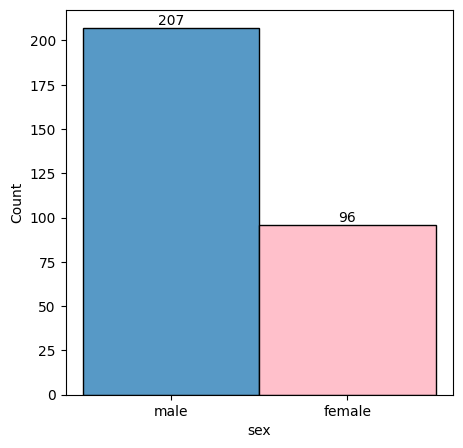

In [14]:
# Checking how many women and men are in the dataset.
plt.figure(figsize=(5, 5))
sns.histplot(data = df, x="sex", discrete=True)
plt.xticks([0, 1])
patches = plt.gca().patches
patches[1].set_fc('pink')

# Adding numbers to the bars
for patch in patches:
    height = patch.get_height()
    plt.annotate('{}'.format(height), xy=(patch.get_x() + patch.get_width() / 2, height),
                 xytext=(0, 0),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()


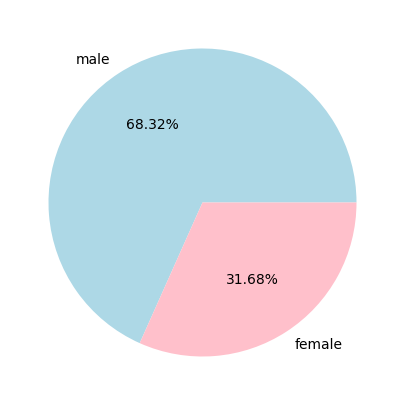

In [17]:
# Plotting gender percentages with pie chart
counts = df["sex"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=counts.index, autopct="%.2f%%", colors=["lightblue", "pink"])
plt.show()

There are around 50 % more male participants in this data than female, but the data is not too imbalanced between sexes.

Let's see next how the age distribution looks like.

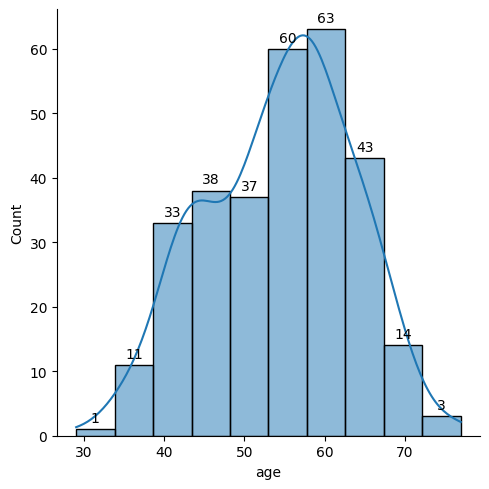

In [16]:
# Plotting age distribution
ax = sns.displot(df["age"], bins=10, kde=True,)

# Adding numbers to the bars
for patch in ax.ax.patches:
    height = patch.get_height()
    ax.ax.annotate('{}'.format(height), xy=(patch.get_x() + patch.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

The age distribution is a little bit right skewed, so people between ages 50 - 70 are the main participants group, but we cannot tell from this if they are the also the main high risk group.

Let's check next how the participants divide in chest pain groups.

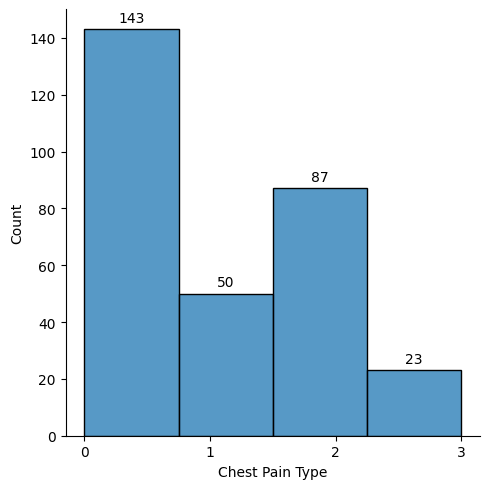

In [18]:
# Plotting chest pain type distribution. Note: Bars are not centered on the x-axis.
ax1 = sns.displot(df["cp"], kde=False, bins=4)
plt.xlabel("Chest Pain Type")
plt.xticks([0, 1, 2, 3])

# Adding numbers to the bars
for patch in ax1.ax.patches:
    height = patch.get_height()
    ax1.ax.annotate('{}'.format(height), xy=(patch.get_x() + patch.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')


Most of the participants seem to belong to the first group, which means that they have had typical angina. The second highest group is non-anginal pain group, which might indicate stroke, which might be a good information to the classification model. The third highest group is atypical angina group and the last group is asymptomatic, which might be a good indicator for low risk classification.

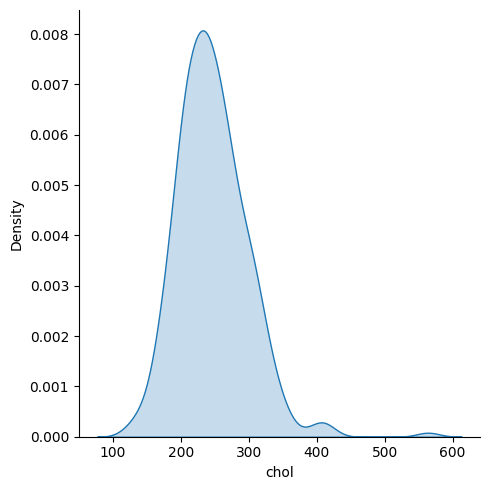

In [19]:
# Plotting cholesterol distribution
ax2 = sns.displot(df["chol"], kind="kde", fill=True)

Previously we saw that the cholesterol feature had the highest variance of all features and we can see from the cholesterol distribution,
that the distribution is centered around 250 chol/dl and the distribution has short tail on the left and long tail on the right which shows that there some outliers in the data, that might give us some needed information. We could say that the distribution is left skewed due to the long tail on the right.

Let's see how the output differs between sexes.

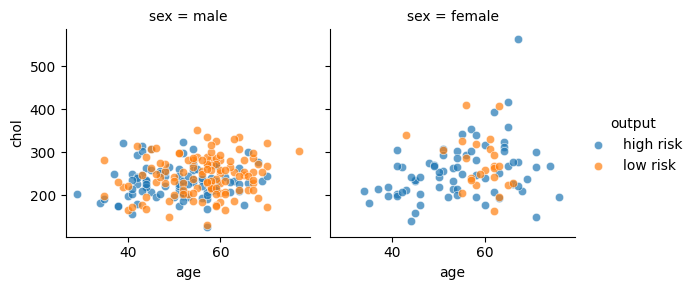

In [20]:
# Checking if there is any correlation between age and cholesterol with different sexes. Output 0 = Low heart attack chance and 1 = High heart attack chance.
g = sns.FacetGrid(df, col="sex", hue="output")
g.map(sns.scatterplot, "age", "chol", alpha=.7)
g.add_legend()

We can see from the plot that male participants with high risk and low risk are almost evenly distruted, so there are people with high risk of stroke with low cholesterol and with high cholesterol in all age groups, so we cannot tell much from the plot how cholesterol affects men. On the female side of the plot there are a lot more variance and outliers, so there could be something important information, especially when almost all low risk participants are between 55-65 age range.

Let's check next if there is something distinctive between cholesterol and resting blood pressure.

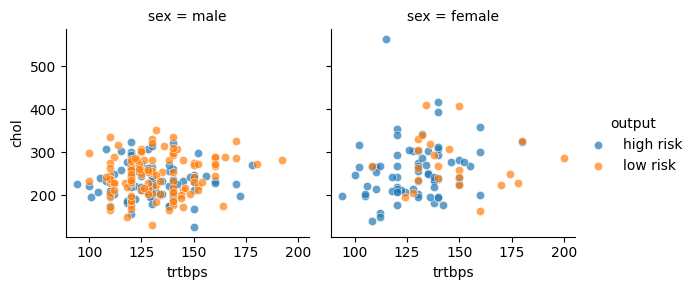

In [21]:
# Checking if there is any correlation between resting blood pressure and cholesterol with different sexes.
g1 = sns.FacetGrid(df, col="sex", hue="output")
g1.map(sns.scatterplot, "trtbps", "chol", alpha=.7)
g1.add_legend()

Again male side looks pretty evenly distributed, so it is hard to gain any information, but female side has again a lot more variance and some outliers and most of the high risk participants have under **150 mm Hg** resting blood pressure.

Let's check next if there is anything between cholesterol and maximum heart rate achieved between sexes.

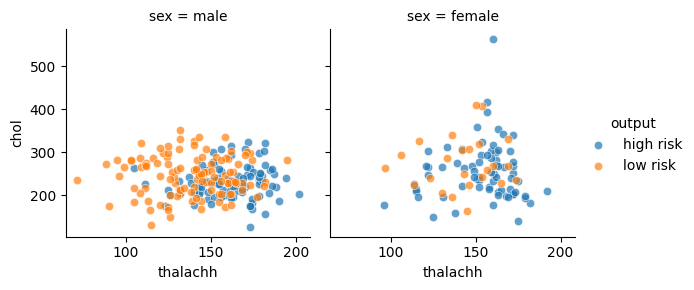

In [23]:
# Checking if there is large difference between sexes in terms of cholesterol and maximum hear rate achieved.
g2 = sns.FacetGrid(df, col="sex", hue='output')
g2.map(sns.scatterplot, "thalachh", "chol", alpha=.7)
g2.add_legend()

Now there seems to be more distinct cluster groups between and male participants with higher than **140 maximum heart rate achieved** were in the high risk group, although there are still many low risk group participants with the same maxium haer rate, but around half of them are below 140. In the female side of the plot there are no distinct groups and high risk and low risk participants are quite evenly distributed, so there probably isn't much information to gain for the model when predicting for females.

Now that we have checked correlations with cholesterol we can check between other features. Let's start with the maximum hear rate and resting blood pressure.

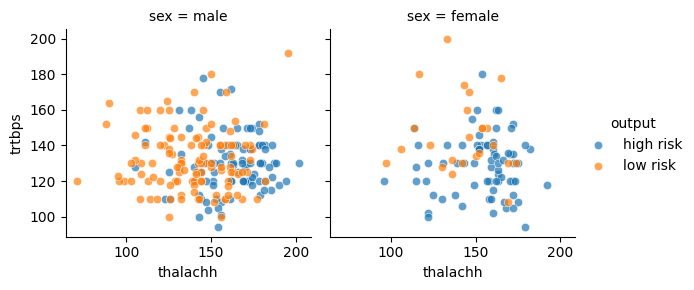

In [24]:
g3 = sns.FacetGrid(df, col='sex', hue='output')
g3.map(sns.scatterplot, 'thalachh', 'trtbps', alpha=.7)
g3.add_legend()

For men we can notice that most of the high risk participants have high maximum heart rate achieved, but blood pressure can vary from low to high almost evenly. On the female side most of the high risk participants have low blood pressure, but maximum heart rate achieved can vary from low to high evenly.

Let's explore next how maximum heart rate achieved and age look together.

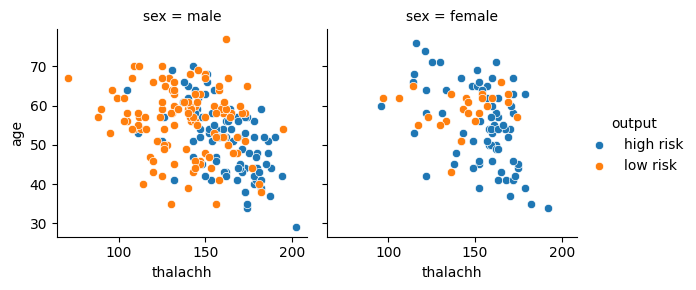

In [26]:
g4 = sns.FacetGrid(df, col='sex', hue='output')
g4.map(sns.scatterplot, 'thalachh', 'age')
g4.add_legend()

Again we can see that high risk participants have high maximum heart rate achieved between all ages, but there are also around half of the low risk participants, who also have high maximum heart rate achieved, so it probably is hard for the model to predict correctly. On the female side most of the low risk participants are aged between 50-65 and they all have maxium heart rate achieved from low to high evenly, but most of the high risk participants do not belong to that age group.

Let's check next if we can find something interesting between resting blood pressure and age.

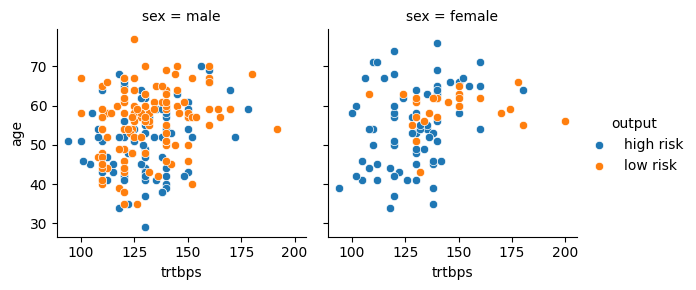

In [29]:
g5 = sns.FacetGrid(df, col='sex', hue='output')
g5.map(sns.scatterplot, 'trtbps', 'age')
g5.add_legend()
plt.show()

The male side is just two clusters on top of each other, so it is probably hard to gain any information. On the female side though again most of the low risk partcipants are in the 50-65 age group and their resting blood pressure vary from low to high. Age seems to be a good feature for female classification and maximum heart rate achieved for male classification.